In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analisis de Datos

In [2]:
dataset=pd.read_csv('../python-ml-course/datasets/wine/winequality-red.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
dataset.shape

(1599, 12)

## Normalizar dataset

In [4]:
dataset_norm=(dataset-dataset.min())/(dataset.max()-dataset.min())
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Crear Cluster Jerarquico con Sklearn

In [5]:
from sklearn.cluster import AgglomerativeClustering

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       2
8       2
9       1
10      2
11      1
12      4
13      5
14      1
15      1
16      0
17      5
18      2
19      5
20      1
21      1
22      5
23      2
24      1
25      2
26      2
27      5
28      2
29      2
       ..
1569    4
1570    0
1571    4
1572    1
1573    4
1574    1
1575    0
1576    0
1577    4
1578    4
1579    4
1580    0
1581    4
1582    4
1583    1
1584    0
1585    0
1586    0
1587    4
1588    0
1589    1
1590    4
1591    4
1592    4
1593    4
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64


Text(0,0.5,'Numero de Vinos')

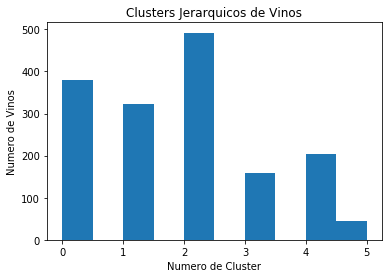

In [23]:
clust_h=AgglomerativeClustering(n_clusters=6,linkage='ward').fit(dataset_norm)
clust_h_groups=pd.Series(clust_h.labels_)
print(clust_h_groups)# ids de vinos con su respectivo cluster al que pertenecen
plt.hist(clust_h_groups)
plt.title('Clusters Jerarquicos de Vinos')
plt.xlabel('Numero de Cluster')
plt.ylabel('Numero de Vinos')

### Dendograma Truncado

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [9]:
clusters2=linkage(dataset_norm,method='ward')

<function matplotlib.pyplot.show(*args, **kw)>

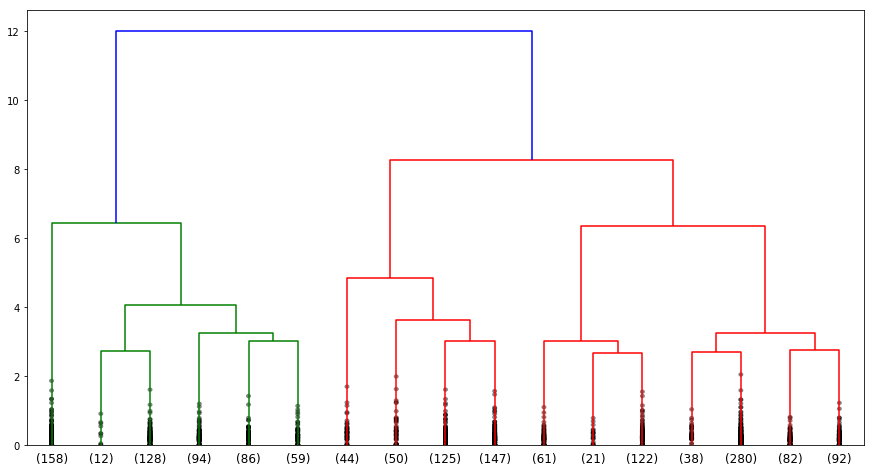

In [20]:
plt.figure(figsize=(15,8))
dendrogram(clusters2,truncate_mode='lastp',p=17,show_contracted=True)
plt.show

## Crear Cluster No Jerarquico (k-means) con Sklearn

In [25]:
from sklearn.cluster import KMeans
from sklearn import datasets

Text(0.5,1,'Cluster de Vinos k-means')

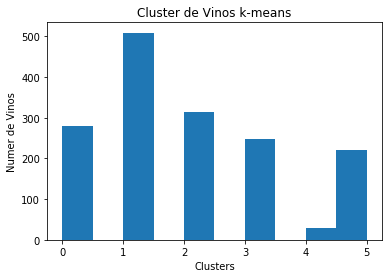

In [28]:
model=KMeans(n_clusters=6).fit(dataset_norm)
clust_k=pd.Series(model.labels_)
plt.hist(clust_k)
plt.xlabel('Clusters')
plt.ylabel('Numer de Vinos')
plt.title('Cluster de Vinos k-means')

In [30]:
dataset_norm['clust_h']=clust_h_groups
dataset_norm['clust_k']=clust_k
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


In [31]:
model.cluster_centers_ #caracteristicas de los centroides

array([[0.36166245, 0.15994374, 0.4195    , 0.10391389, 0.10674934,
        0.16272636, 0.08533569, 0.41656965, 0.42244094, 0.23588537,
        0.47774725, 0.68857143],
       [0.26258324, 0.35941411, 0.11805501, 0.09141615, 0.1233982 ,
        0.1453416 , 0.10692343, 0.49015374, 0.48752378, 0.15557098,
        0.22181754, 0.44165029],
       [0.3179941 , 0.28097412, 0.30292063, 0.15262013, 0.12723852,
        0.3782249 , 0.29718997, 0.54121856, 0.43444569, 0.17787283,
        0.21102157, 0.45269841],
       [0.58249436, 0.20765626, 0.51105263, 0.13451833, 0.13089968,
        0.13816502, 0.0918871 , 0.65661358, 0.3306449 , 0.22332663,
        0.29029378, 0.5465587 ],
       [0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451, 0.46428571],
       [0.17304907, 0.32334994, 0.09159091, 0.09327522, 0.09518136,
        0.25496159, 0.12690331, 0.32130557, 0.58031496, 0.1860098 ,
        0.49296037,

## Interpretacion Final

In [32]:
dataset_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.361662,0.159944,0.419500,0.103914,0.106749,0.162726,0.085336,0.416570,0.422441,0.235885,0.477747,0.688571,0.142857
1,0.262583,0.359414,0.118055,0.091416,0.123398,0.145342,0.106923,0.490154,0.487524,0.155571,0.221818,0.441650,2.027505
2,0.317994,0.280974,0.302921,0.152620,0.127239,0.378225,0.297190,0.541219,0.434446,0.177873,0.211022,0.452698,1.057143
3,0.582494,0.207656,0.511053,0.134518,0.130900,0.138165,0.091887,0.656614,0.330645,0.223327,0.290294,0.546559,2.064777
4,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000
5,0.173049,0.323350,0.091591,0.093275,0.095181,0.254962,0.126903,0.321306,0.580315,0.186010,0.492960,0.612727,3.459091
